# Credit Exploratory Data Analysis

In [1]:
# Import the required Libraries for numerical and Data Analysis and plotting

import pandas as pd, numpy as np, matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline

# Set the options to display no. of rows and columns
pd.set_option('display.max_columns',300)
pd.set_option('display.max_rows',100)

In [2]:
#Reading the applicaton data

df= pd.read_csv("application_data.csv")

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Columns to drop with more than 40% Null's

In [4]:
# Removing the columns having 40% or more null rows

drop_cols=df.isnull().sum()[df.isnull().sum()/df.shape[0] > .4]/df.shape[0]
df.drop(columns=drop_cols.index,inplace=True)


Datatype check : All the remaining columns has correct datatype

In [5]:
#Removing the colums which we feel not important for data analysis

not_req=['FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE','FLAG_PHONE',
       'FLAG_EMAIL','CNT_CHILDREN','NAME_TYPE_SUITE','FLAG_CONT_MOBILE',
        'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
        'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

In [6]:
#Drop the columns which are not required

df.drop(columns=not_req,inplace=True)

In [7]:
df.shape

(307511, 20)

- ###  Imputation on Columns

In [8]:
df.CODE_GENDER.value_counts()
# Based on value counts, imputing the column values of 'XNA' with mode. 

df.loc[df.CODE_GENDER=='XNA','CODE_GENDER']= df.CODE_GENDER.mode()

In [9]:
df.ORGANIZATION_TYPE.value_counts(normalize=True)
# as the Organization type = 'XNA' has 18% of records , we are not gonna exclude as may loss insights from other variables.
#df=df.drop(list(df.loc[df.ORGANIZATION_TYPE=='XNA'].index))

#Instead of droping, made the column values as null

df.loc[df.ORGANIZATION_TYPE=='XNA','ORGANIZATION_TYPE']=np.NaN


- ###  Deriving New columns

By understanding from the continuous variables, derived the new columns from CNT_FAM_MEMBERS, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY.

#### FAMILY_SIZE

In [10]:
#New column FAMILY_SIZE, derived from CNT_FAM_MEMBERS and then droping the CNT_FAM_MEMBERS column 

df.CNT_FAM_MEMBERS.value_counts(ascending=False,normalize=True)
#Bins divided on basis of Normalized values

df['FAMILY_SIZE']=pd.cut(df.CNT_FAM_MEMBERS,bins=[0,1,3,5,15],labels=['Single','Small','Medium','Large'])

# Drop CNT_FAM_MEMBERS variable 
df.drop(columns='CNT_FAM_MEMBERS',inplace=True)

#### AGE_IN_YEARS

In [11]:
#New column AGE_IN_YEARS, derived from DAYS_BIRTH and then droping the DAYS_BIRTH column 

df['AGE_IN_YEARS']=round(abs(df.DAYS_BIRTH)/365)

df.AGE_IN_YEARS.value_counts(ascending=False,normalize=True)

# Drop DAYS_BIRTH variable 
df.drop(columns='DAYS_BIRTH',inplace=True)

#### EXPERIENCE_IN_YEARS

In [12]:
#New column EXPERIENCE_IN_YEARS, derived from DAYS_EMPLOYED and then droping the DAYS_EMPLOYED column 

df['EXPERIENCE_IN_YEARS']=round(abs(df.DAYS_EMPLOYED)/365)
df.EXPERIENCE_IN_YEARS.value_counts()

# Check if any anomolies in the Age variable and make it NaN
df.loc[df.EXPERIENCE_IN_YEARS>100,'EXPERIENCE_IN_YEARS']=np.NaN

# Drop DAYS_EMPLOYED variable 
df.drop(columns='DAYS_EMPLOYED',inplace=True)

#### POPULATION_DENSITY

In [13]:
#New column POPULATION_DENSITY, derived from REGION_POPULATION_RELATIVE and then droping the REGION_POPULATION_RELATIVE column 

df.REGION_POPULATION_RELATIVE.describe(percentiles=[.33,.66])

# based on the max value on REGION_POPULATION_RELATIVE variable 1/3rd and 2/3rd calculated, created a new column Population Density.

df['POPULATION_DENSITY']=pd.cut(df.REGION_POPULATION_RELATIVE,bins=[0,0.024,0.048,1],labels=['Low','Medium','High'])

# drop REGION_POPULATION_RELATIVE
df.drop(columns='REGION_POPULATION_RELATIVE',inplace=True)

In [14]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,FAMILY_SIZE,AGE_IN_YEARS,EXPERIENCE_IN_YEARS,POPULATION_DENSITY
0,100002,1,Cash loans,M,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,2,2,Business Entity Type 3,Single,26.0,2.0,Low
1,100003,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,Core staff,1,1,School,Small,46.0,3.0,Low
2,100004,0,Revolving loans,M,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,2,2,Government,Single,52.0,1.0,Low
3,100006,0,Cash loans,F,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2,2,Business Entity Type 3,Small,52.0,8.0,Low
4,100007,0,Cash loans,M,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,2,2,Religion,Single,55.0,8.0,Medium


#### AGE_RANGE

In [15]:
#New column AGE_RANGE, derived from AGE_IN_YEARS 

df.AGE_IN_YEARS.describe()

# Bins created based on 25, 50, 75, 100 percentiles

df['AGE_RANGE']=pd.cut(df.AGE_IN_YEARS,bins=[0,30,45,55,100],labels=['<30','30-45','45-55','>55'])

#### EXPERIENCE_RANGE

In [16]:
#New column EXPERIENCE_RANGE, derived from EXPERIENCE_IN_YEARS

df.EXPERIENCE_IN_YEARS.value_counts()

lab=['0-5','6-10','11-15','16-20','21-25','26-30','31-35','36-40','41-45','46-50']

df['EXPERIENCE_RANGE']=pd.cut(df.EXPERIENCE_IN_YEARS,bins=list(np.arange(0,51,5)),labels=lab)

#### REGION_RATING

In [17]:
#New column REGION_RATING, derived from REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY , 
#took the average of above 2 varaiables and binned them in 3 profiles LOW, MEDIUM, HIGH

df['REGION_RATING']=pd.cut(df.REGION_RATING_CLIENT+df.REGION_RATING_CLIENT_W_CITY/2,bins=[0,1,2,3],labels=['Low Profile','Medium Profile','High Profile'])
df.drop(columns=['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY'],inplace=True)

- ### Univarient analysis- Outlier Treatment

#### AMT_INCOME_TOTAL



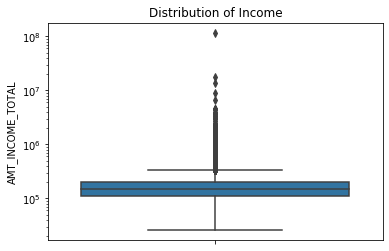

In [18]:
# observing the distribution of Income variable on Logarithamic scale

sns.boxplot(data=df,y='AMT_INCOME_TOTAL')
plt.yscale('log')
plt.title('Distribution of Income')
plt.show()

Points to be concluded from the above graph.

1. Upper whisker is very slim from Income compared to Lower whisker states that there are less clients with high income amounts.
2. Some outliers noticed and will be binned based on 95, 99 percentile/quantiles.

In [19]:
#Income distribution based on quantiles

df.AMT_INCOME_TOTAL.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    147150.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

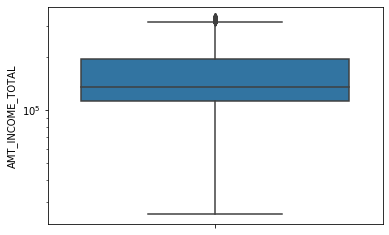

In [20]:
# 95th percentile, the distribution excluded almost outliers
sns.boxplot(data=df[df.AMT_INCOME_TOTAL<337500],y='AMT_INCOME_TOTAL')
plt.yscale('log')
plt.show()

Points to be concluded from the above graph.

1. Some outliers removed/binned on 99 percentile.

In [21]:
#distribution of Income in 10 to 100 percent quantile range
df.AMT_INCOME_TOTAL.quantile([0.1, 0.2, 0.3, 0.4, 0.5,.6,.7,.8,.9,0.95,.99,1])

0.10        81000.0
0.20        99000.0
0.30       112500.0
0.40       135000.0
0.50       147150.0
0.60       162000.0
0.70       180000.0
0.80       225000.0
0.90       270000.0
0.95       337500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

### INCOME_RANGE

Binning the AMT_INCOME_TOTAL variable

In [22]:
# bins created based on above quantile range and labeled accordingly, outilers are handled by keeping them in a seperate bin

bin=[0,80000,100000,120000,140000,160000,180000,220000,280000,340000,480000,117000000]
label=['<80000','80000-100000','100000-120000','120000-140000','140000-160000',
       '160000-180000','180000-220000','220000-280000','280000-340000','340000-480000','>480000']

df['INCOME_RANGE']=pd.cut(df.AMT_INCOME_TOTAL,bins=bin,labels=label)

### AMT_CREDIT

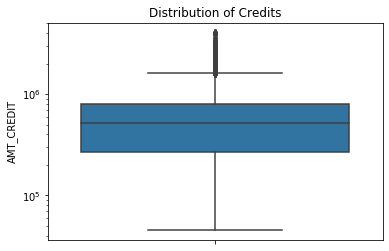

In [23]:
sns.boxplot(data=df,y='AMT_CREDIT')
plt.yscale('log')
plt.title('Distribution of Credits')
plt.show()

Points to be concluded from the above graph.

1. Upper whisker is very slim from Income compared to Lower whisker states that there are less clients applied for high credits.
2. Some outliers noticed and will be binned based on 95, 99 percentile/quantiles


In [24]:
#distribution of Income in 10 to 100 percent quantile range

df.AMT_CREDIT.quantile([0.1, 0.2, 0.3, 0.4, 0.5,.6,.7,.8,.9,0.95,.99,1])

0.10     180000.0
0.20     254700.0
0.30     306306.0
0.40     432000.0
0.50     513531.0
0.60     604152.0
0.70     755190.0
0.80     900000.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

In [25]:
# bins created based on above quantile range and labeled accordingly, outilers are handled by keeping them in a seperate bin

bin=[0,180000,260000,340000,420000,500000,600000,750000,900000,1150000,1350000,1850000,4050000]
label=['<180000','180000-260000','260000-340000','340000-420000','420000-500000',
       '500000-600000','600000-750000','750000-900000','900000-1150000','1150000-1350000','1350000-1850000','>1850000']
df['CREDIT_RANGE']=pd.cut(df.AMT_CREDIT,bins=bin,labels=label)

In [26]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,FAMILY_SIZE,AGE_IN_YEARS,EXPERIENCE_IN_YEARS,POPULATION_DENSITY,AGE_RANGE,EXPERIENCE_RANGE,REGION_RATING,INCOME_RANGE,CREDIT_RANGE
0,100002,1,Cash loans,M,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3,Single,26.0,2.0,Low,<30,0-5,High Profile,180000-220000,340000-420000
1,100003,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,Core staff,School,Small,46.0,3.0,Low,45-55,0-5,Medium Profile,220000-280000,1150000-1350000
2,100004,0,Revolving loans,M,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Government,Single,52.0,1.0,Low,45-55,0-5,High Profile,<80000,<180000
3,100006,0,Cash loans,F,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,Business Entity Type 3,Small,52.0,8.0,Low,45-55,6-10,High Profile,120000-140000,260000-340000
4,100007,0,Cash loans,M,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,Religion,Single,55.0,8.0,Medium,45-55,6-10,High Profile,120000-140000,500000-600000


In [27]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

df0=df.loc[df["TARGET"]==0]
df1=df.loc[df["TARGET"]==1]

In [28]:
# Calculating Imbalance percentage
    
# Since the majority is target0 and minority is target1

round(len(df0)/len(df1),2)

11.39

- ### Bivarient analysis by Countplot and Heatmap

In [29]:
# Defined a function - biplot to plot the insights among the variables
#Count plotting in logarithmic scale

def biplot(data1,col,title1,data2,title2,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    #plt.figure(figsize=(8,5))
    plt.rcParams['axes.titlesize'] = 15
    plt.rcParams['axes.titlepad'] = 10
    plt.rcParams["axes.labelsize"] = 12
    
    f, axes = plt.subplots(1,2,sharey=True,sharex=True,figsize=(11,5))
    
    #plt.subplot(1,2,1)
    
    sns.countplot(data = data1, y= col,hue = hue,palette='Dark2',ax=axes[0]) 
    axes[0].set_title(title1)
    
    plt.yticks(rotation=0)
    plt.xscale('log')
    
    plt.title(title1)
    
    #plt.subplot(1,2,2)
    sns.countplot(data = data2, y= col,hue = hue,palette='Dark2',ax=axes[1])
    plt.yticks(rotation=0)
    plt.xscale('log')
    plt.ylabel('')
    
    axes[1].set_title(title2)
     
        
    plt.show()

### Insights - Subplots
The whole understanding is to get the insights for Male and Female seperatly for both clients having 
payment difficulties and others 

Understanging the below Subplots :
1. Left    : Male
2. Right   : Female
3. Target=1: Payment difficulties
4. Target=0: Others    

In [30]:
# Segrigating the data by CODE_GENDER

data1=df[df.CODE_GENDER=='M']
data2=df[df.CODE_GENDER=='F']

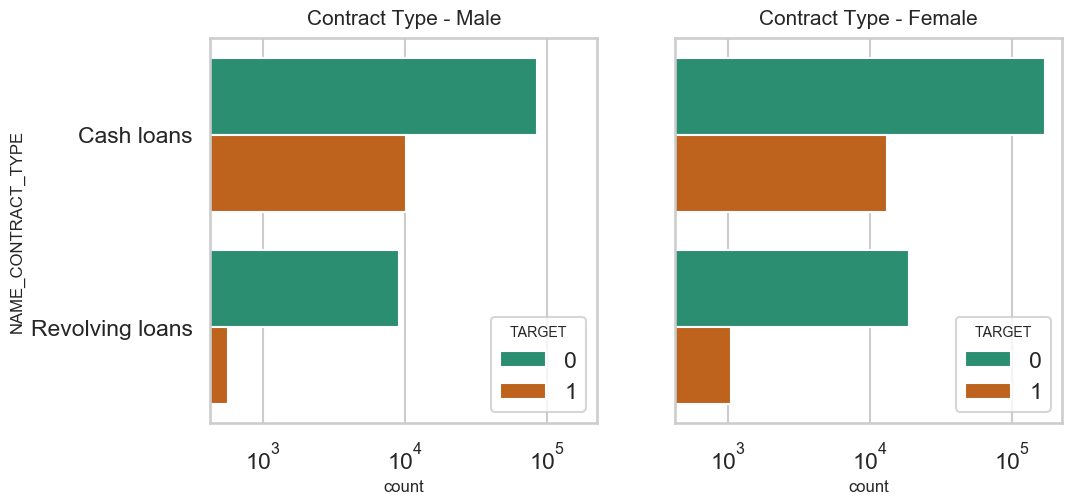

In [31]:
# Subplots - NAME_CONTRACT_TYPE - CODE_GENDER - TARGET

sns.reset_defaults()
plt.rcdefaults()

biplot(data1,'NAME_CONTRACT_TYPE',"Contract Type - Male",data2,'Contract Type - Female',hue ='TARGET')

Points to be concluded from the above graph.

1. Female Clients are showing interest to take credits than Male Clients
2. Difficulty in Payment is high for Female clients.


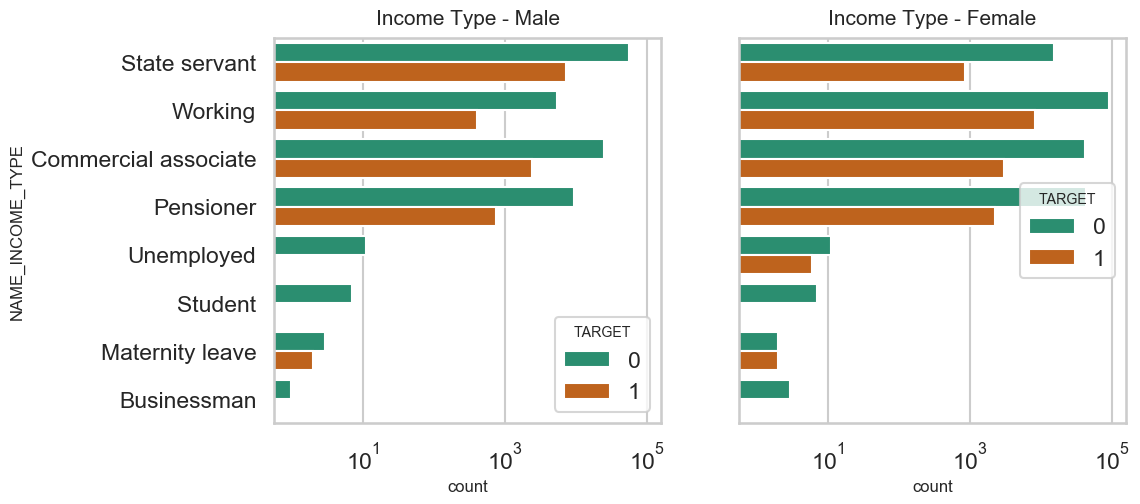

In [32]:
# Subplots - NAME_INCOME_TYPE - CODE_GENDER - TARGET

sns.reset_defaults()
plt.rcdefaults()

biplot(data1,'NAME_INCOME_TYPE',"Income Type - Male",data2,'Income Type - Female',hue ='TARGET')

Points to be concluded from the above graph.

1. Working,Pensioner Unemployed women are having highest difficulty in repayment of loans
2. State servant, Commercial Associate Men are having payment difficulty.
3. Repaying capacity of Business women is high compared to men.
4. No defaults for Student Clients.


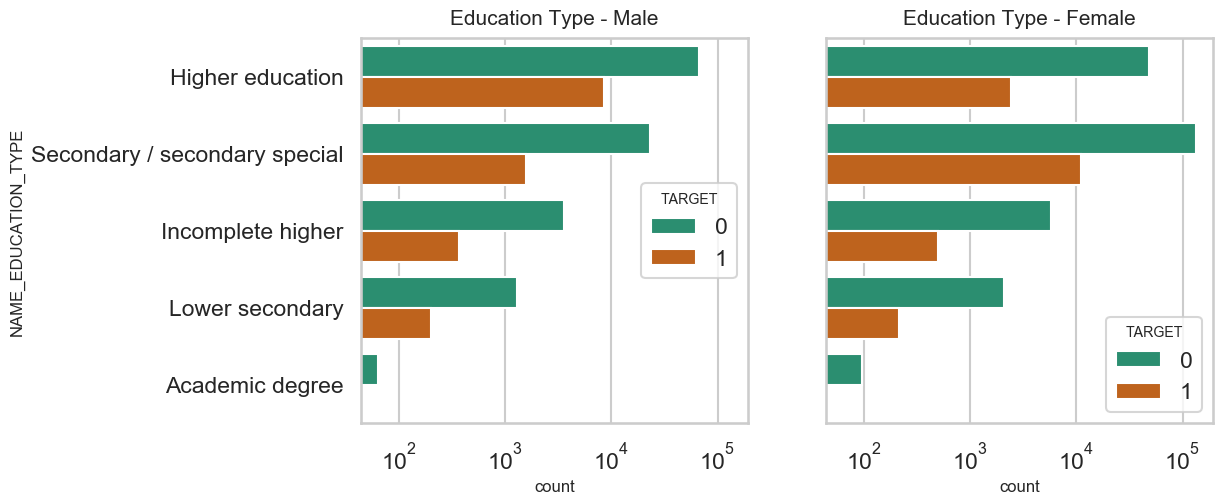

In [33]:
# Subplots - NAME_EDUCATION_TYPE - CODE_GENDER - TARGET

sns.reset_defaults()
plt.rcdefaults()

biplot(data1,'NAME_EDUCATION_TYPE',"Education Type - Male",data2,'Education Type - Female',hue ='TARGET')

Points to be concluded from the above graph.

1. Women with qualification as Secoundry/Secondary Special has high repay capacity and payment difficulties.
2. Clients with Academic degree does not have payment difficulties.
3. Men with Higher education has high repay capacity and payment difficulties.

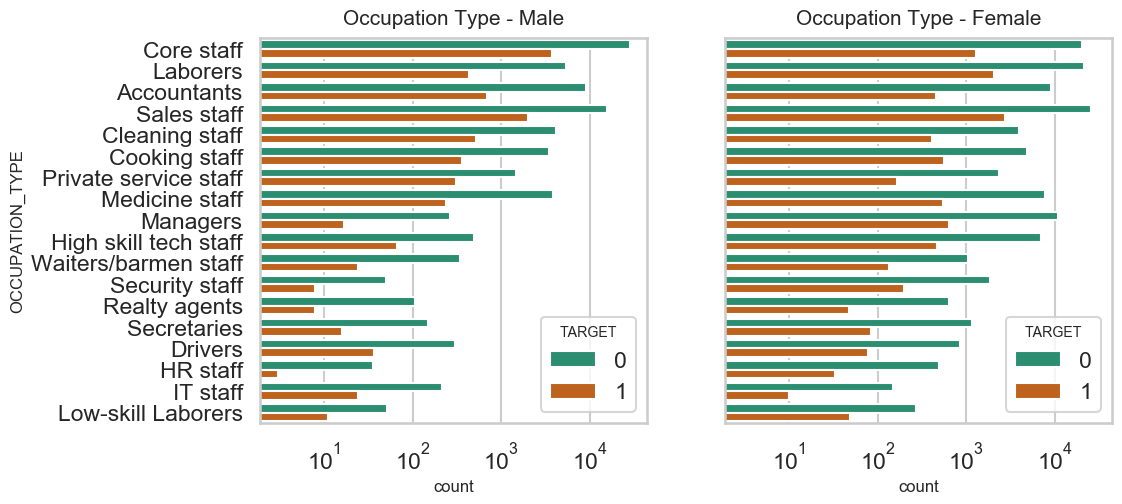

In [34]:
# Subplots - NAME_OCCUPATION_TYPE - CODE_GENDER - TARGET

sns.reset_defaults()
plt.rcdefaults()

biplot(data1,'OCCUPATION_TYPE',"Occupation Type - Male",data2,'Occupation Type - Female',hue ='TARGET')

Points to be concluded from the above graph.

1. For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.
2. For this Females are having more number of credits than male specifically working women have more number of credits compare to male.
3. Less number of credits for income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’.

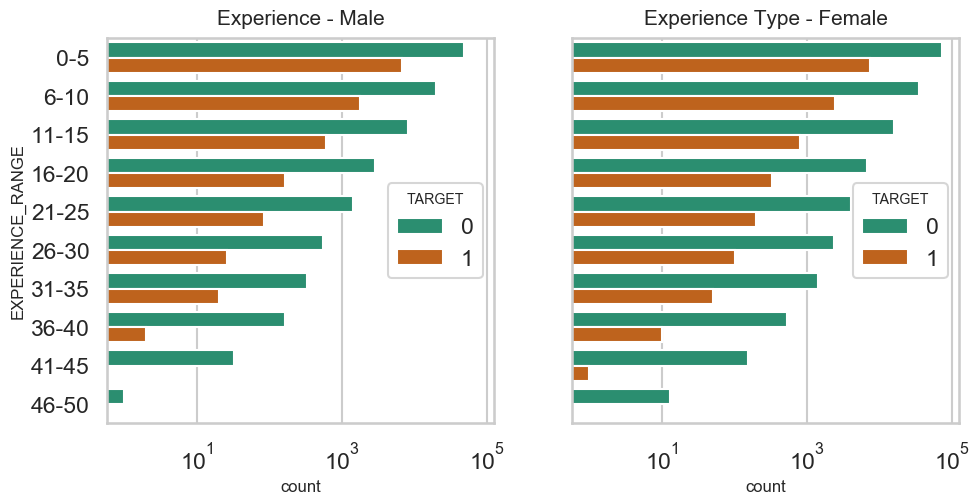

In [35]:
# Subplots - EXPERIENCE_RANGE - CODE_GENDER - TARGET

sns.reset_defaults()
plt.rcdefaults()

biplot(data1,'EXPERIENCE_RANGE',"Experience - Male",data2,'Experience Type - Female',hue ='TARGET')

#### Points to be concluded from the above graph.

1. Clients with Experience 41-50 has no payment difficulty.
2. For this both Male and Female almost same but though Female is leading for loans in range of 0-5 work ex.

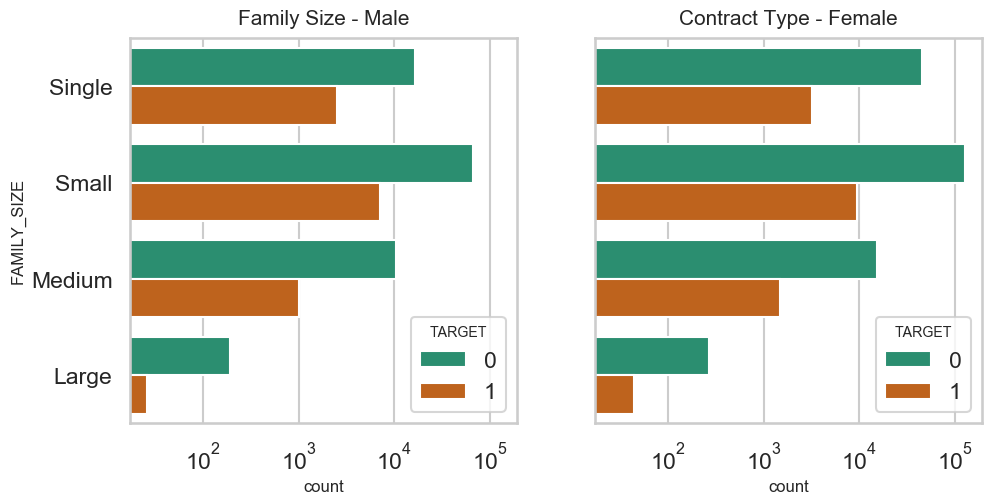

In [36]:
# Subplots - FAMILY SIZE - CODE_GENDER - TARGET

sns.reset_defaults()
plt.rcdefaults()

biplot(data1,'FAMILY_SIZE',"Family Size - Male",data2,'Contract Type - Female',hue ='TARGET')

#### Points to be concluded from the above graph.

1. Clients having small family has higher repay capacity as well as  payment difficulty.
2. Single Females has higher repay capacity than Males. 

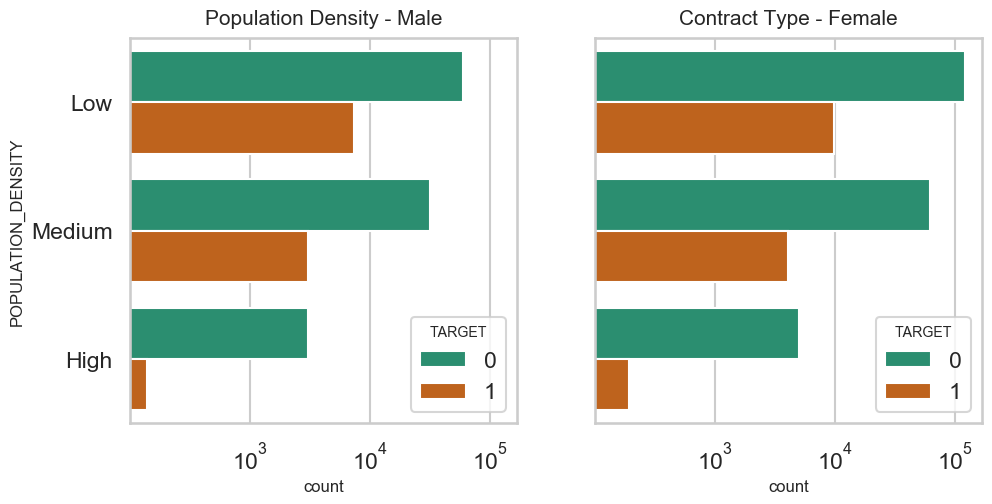

In [37]:
# Subplots - POPULATION_DENSITY - CODE_GENDER - TARGET

sns.reset_defaults()
plt.rcdefaults()

biplot(data1,'POPULATION_DENSITY',"Population Density - Male",data2,'Contract Type - Female',hue ='TARGET')

Points to be concluded from the above graph.

1. Less payment difficulty at high Populated areas.
2. Higher repay capacity and default rate for Low populated areas.


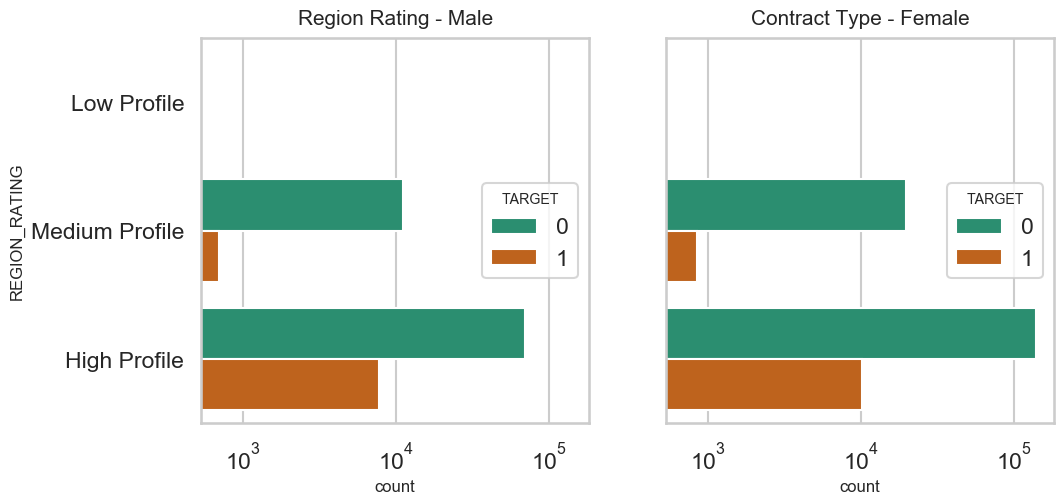

In [38]:
# Subplots - Region Rating - CODE_GENDER - TARGET

sns.reset_defaults()
plt.rcdefaults()

biplot(data1,'REGION_RATING',"Region Rating - Male",data2,'Contract Type - Female',hue ='TARGET')

Points to be concluded from the above graph.

1. Medium profile area has least payment difficulty.
2. Higher repay capacity for High profile areas


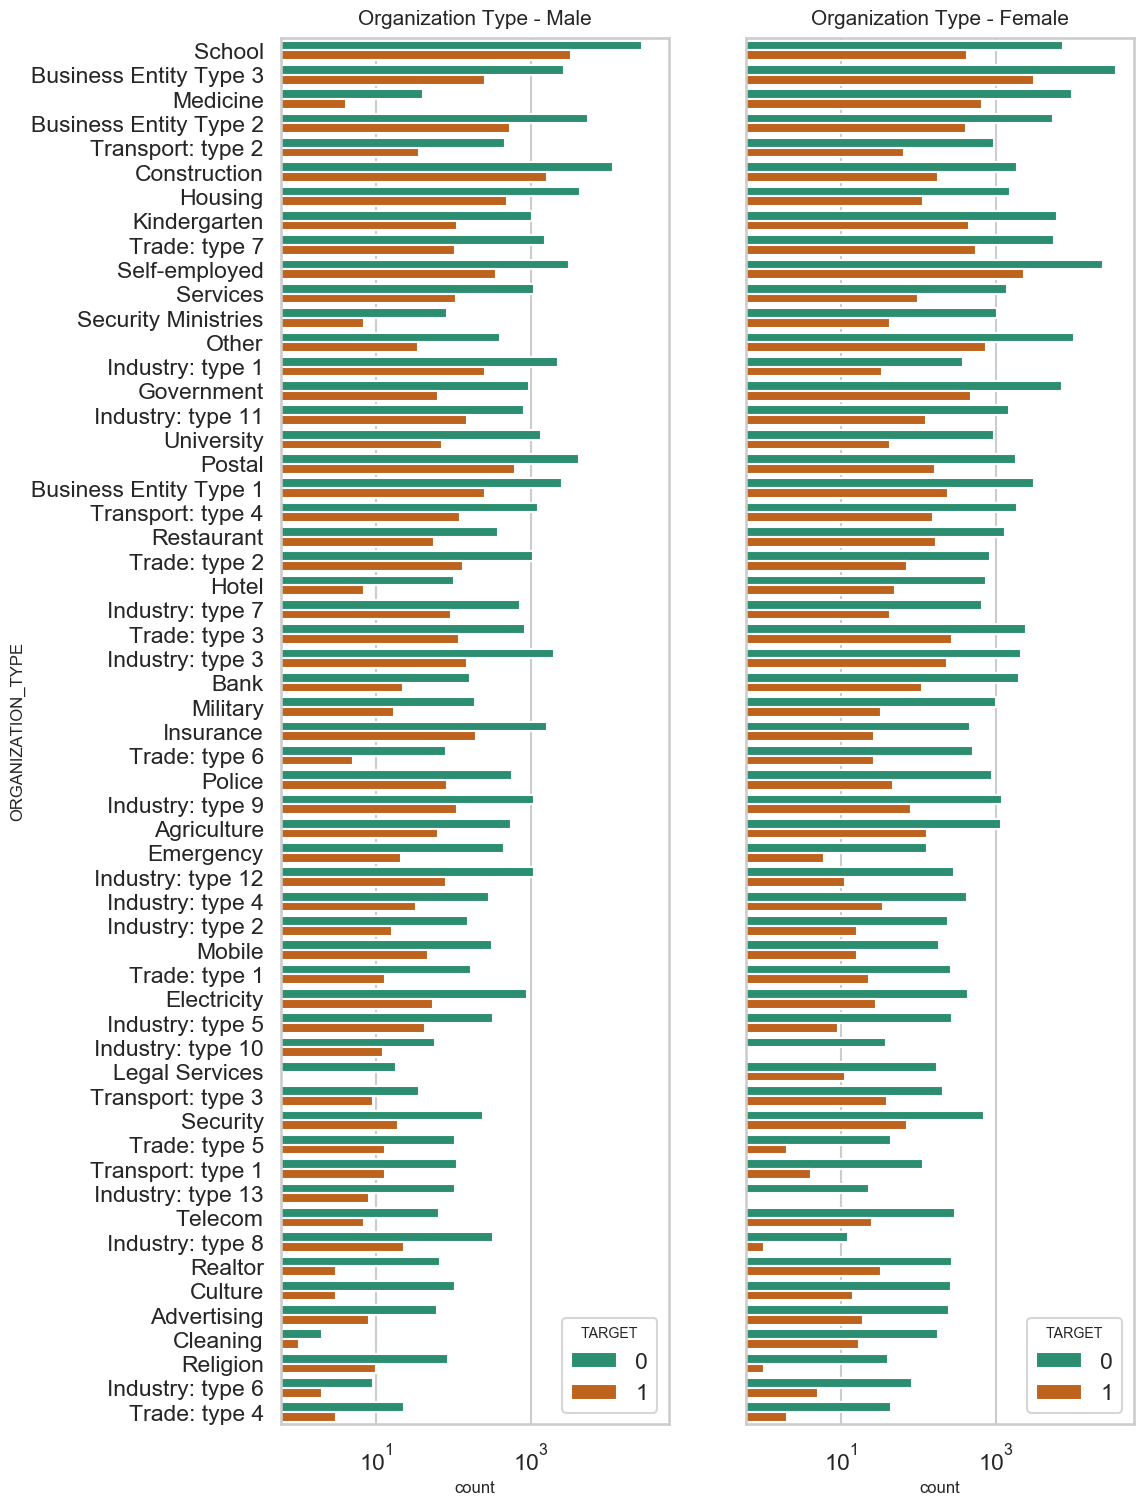

In [39]:
# Subplots - ORGANIZATION_TYPE - CODE_GENDER - TARGET

sns.reset_defaults()
plt.rcdefaults()

col='ORGANIZATION_TYPE'
title1='Organization Type - Male'
title2='Organization Type - Female'
hue='TARGET'

sns.set_style('whitegrid')
sns.set_context('talk')
    #plt.figure(figsize=(8,5))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlepad'] = 10
plt.rcParams["axes.labelsize"] = 12
    
f, axes = plt.subplots(1,2,sharey=True,sharex=True,figsize=(11,18))
    
    #plt.subplot(1,2,1)
    
sns.countplot(data = data1, y= col,hue = hue,palette='Dark2',ax=axes[0]) 
axes[0].set_title(title1)
    
plt.yticks(rotation=0)
plt.xscale('log')
    
plt.title(title1)
    
    #plt.subplot(1,2,2)
sns.countplot(data = data2, y= col,hue = hue,palette='Dark2',ax=axes[1])
plt.yticks(rotation=0)
plt.xscale('log')
plt.ylabel('')
    
axes[1].set_title(title2)

plt.show()



Points to be concluded from the above graph.

1. For Females client with Occupation as Industry Type 8,  and religion has less payment difficulties.
2. High payment dificulty for Business type 3 Women and School Men clients.
3. Banks can support by giving loans to Leagal setvice Men and Industry Type 10 , 13 Women.
4. Clients who applied for Credits are from most organization type : Business Type3, Self Employed,Other and Government.

- ### Insights - Heatmap

Understanding the Catagorical Variables for the clients having payment difficulties and others

To count the values distributed accross two different Catogorical Variables we derived pivot tables for TARGET 0 and 1
with the help of additional column CNT having the value 1 for all the rows.

Understanding the Heatmaps:
1. Left : Target 0 - Others - denoted "O" in the graph
2. Right : Target 1 - with Payment Difficulties - denoted "PD" in the graph



In [40]:
#Definition of Heatmap - designed for better visualization among catogorical Variables

def heatmap(data1,title1,data2,title2):
    plt.figure(figsize=(11,5))
    plt.rcParams['axes.titlesize'] = 15
    plt.rcParams['axes.titlepad'] = 10
    plt.rcParams["axes.labelsize"] = 12
    plt.subplot(1,2,1)

# heatmap with a color map of choice


    sns.heatmap(data1, cmap="Blues",annot=False)
    plt.title(title1)
    plt.yticks(rotation=0)
    plt.subplot(1,2,2)
    sns.heatmap(data2, cmap="Blues",annot=False,yticklabels=False)
    
    plt.title(title2)
    plt.yticks(rotation=0)
    plt.show()

In [41]:
# Column created to count the Catogorical Variables

df['CNT']=1

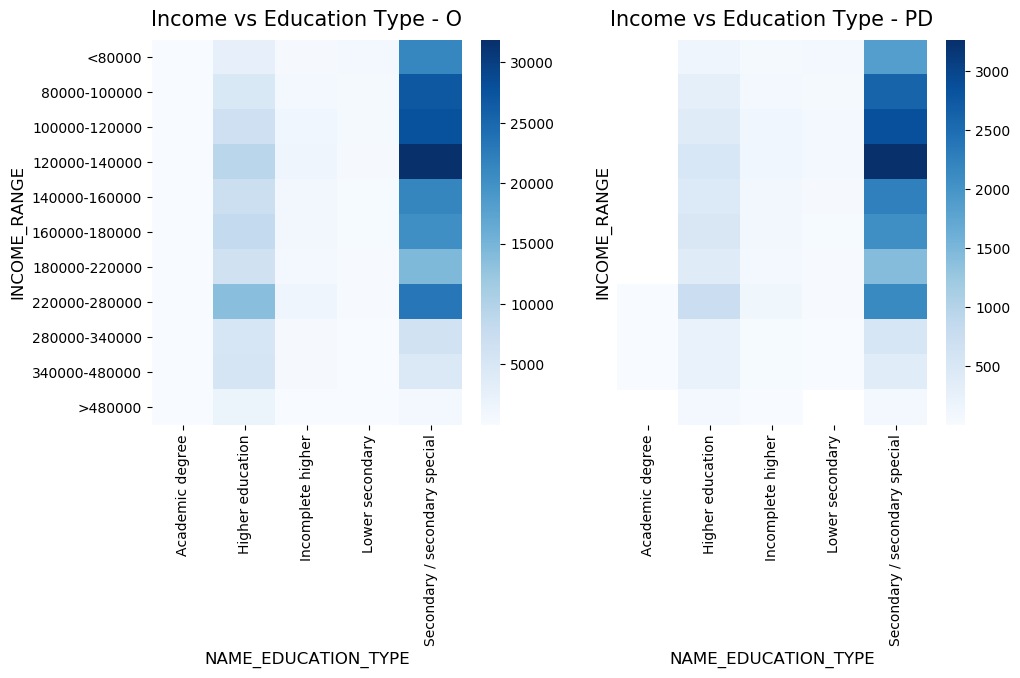

In [42]:
# Heatmap Income_range - Education_type - Target

sns.reset_defaults()
plt.rcdefaults()


res=pd.pivot_table(data=df[df.TARGET==0],index='INCOME_RANGE',columns='NAME_EDUCATION_TYPE',values='CNT'
               ,aggfunc=np.sum)
res1=pd.pivot_table(data=df[df.TARGET==1],index='INCOME_RANGE',columns='NAME_EDUCATION_TYPE',values='CNT'
               ,aggfunc=np.sum)

heatmap(data1=res,title1='Income vs Education Type - O',data2=res1,title2='Income vs Education Type - PD')




Points to be concluded from the above graph.

1. Income range from less than 220000 and and greater than 480000 with Acadamic Degree has no pament difficulties.
2. Income range from 120000- 140000 has higher payment difficulty. 


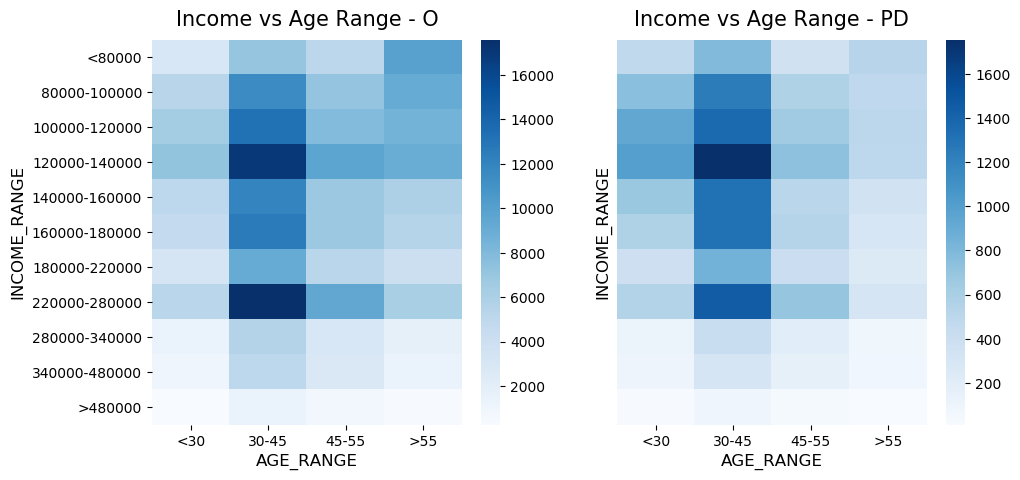

In [43]:
# Heatmap Income_range - Age Range - Target

sns.reset_defaults()
plt.rcdefaults()


res=pd.pivot_table(data=df[df.TARGET==0],index='INCOME_RANGE',columns='AGE_RANGE',values='CNT'
               ,aggfunc=np.sum)
res1=pd.pivot_table(data=df[df.TARGET==1],index='INCOME_RANGE',columns='AGE_RANGE',values='CNT'
               ,aggfunc=np.sum)

heatmap(data1=res,title1='Income vs Age Range - O',data2=res1,title2='Income vs Age Range - PD')





Points to be concluded from the above graph.

1. Age range 30-45, income range between 1.2L - 1.4L and 2.2L- 2.8L has high repay capacity.
2. Age range 30-45, income range between 1.2L - 1.4L has high payment difficulties.


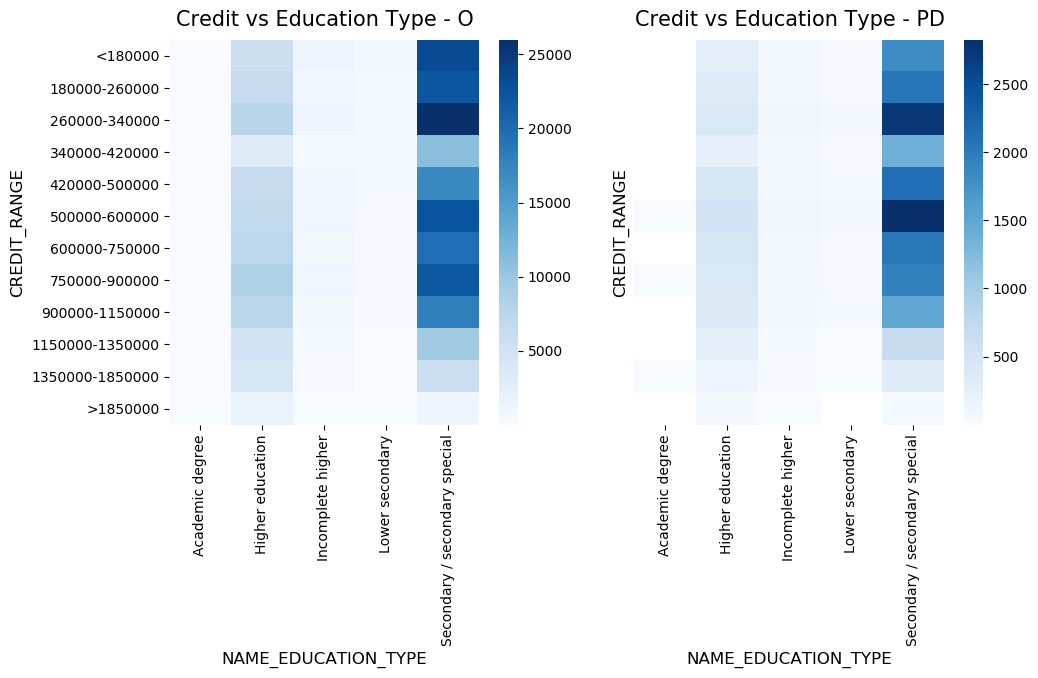

In [44]:
# Heatmap Credit_range - Education_type - Target
sns.reset_defaults()
plt.rcdefaults()


res=pd.pivot_table(data=df[df.TARGET==0],index='CREDIT_RANGE',columns='NAME_EDUCATION_TYPE',values='CNT'
               ,aggfunc=np.sum)
res1=pd.pivot_table(data=df[df.TARGET==1],index='CREDIT_RANGE',columns='NAME_EDUCATION_TYPE',values='CNT'
               ,aggfunc=np.sum)

heatmap(data1=res,title1='Credit vs Education Type - O',data2=res1,title2='Credit vs Education Type - PD')





Points to be concluded from the above graph.
1. Credit Range 500000- 600000 has high pament difficulty for Secoundary Education type clients.
2. Credit loans less than 340000 has high repay capacity.


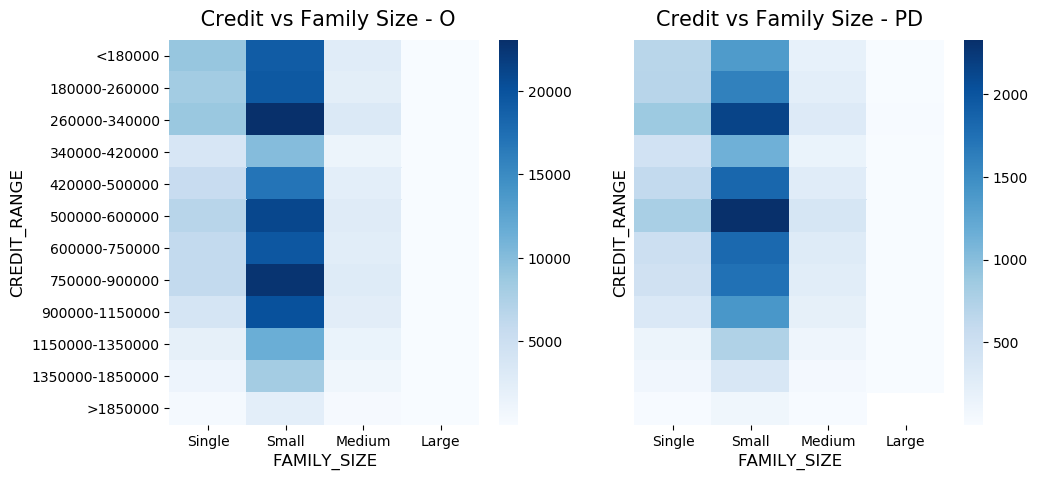

In [45]:

# Heatmap Credit_range - Family Size - Target
sns.reset_defaults()
plt.rcdefaults()


res=pd.pivot_table(data=df[df.TARGET==0],index='CREDIT_RANGE',columns='FAMILY_SIZE',values='CNT'
               ,aggfunc=np.sum)
res1=pd.pivot_table(data=df[df.TARGET==1],index='CREDIT_RANGE',columns='FAMILY_SIZE',values='CNT'
               ,aggfunc=np.sum)

heatmap(data1=res,title1=' Credit vs Family Size - O',data2=res1,title2='Credit vs Family Size - PD')





Points to be concluded from the above graph.
1. Credit Range 500000- 600000 has high pament difficulty for Small size clients.


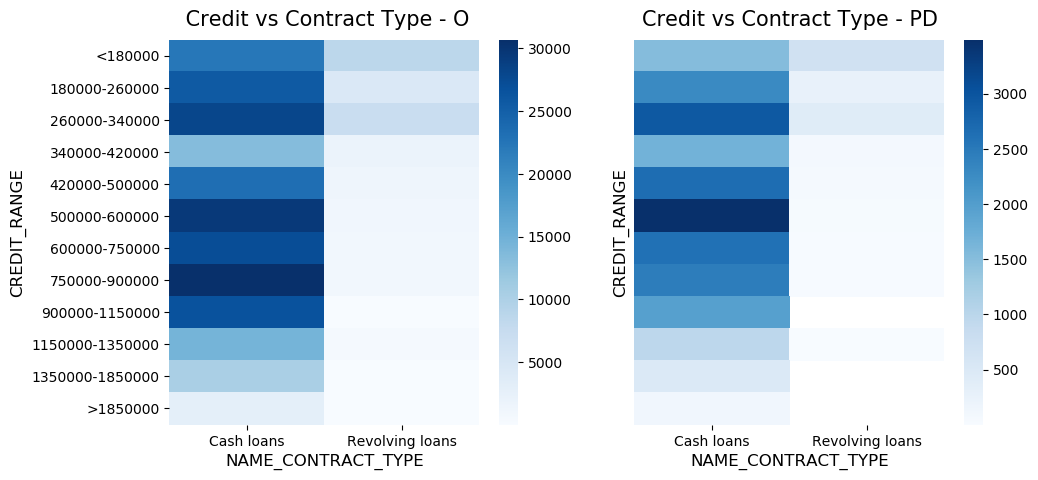

In [46]:
# Heatmap Credit_range - Contract_type - Target

sns.reset_defaults()
plt.rcdefaults()

res=pd.pivot_table(data=df[df.TARGET==0],index='CREDIT_RANGE',columns='NAME_CONTRACT_TYPE',values='CNT'
               ,aggfunc=np.sum)
res1=pd.pivot_table(data=df[df.TARGET==1],index='CREDIT_RANGE',columns='NAME_CONTRACT_TYPE',values='CNT'
               ,aggfunc=np.sum)

heatmap(data1=res,title1=' Credit vs Contract Type - O',data2=res1,title2='Credit vs Contract Type - PD')



Points to be concluded from the above graph.

1. Credit Range 500000- 600000 has high pament difficulty for Cash Loans type clients.

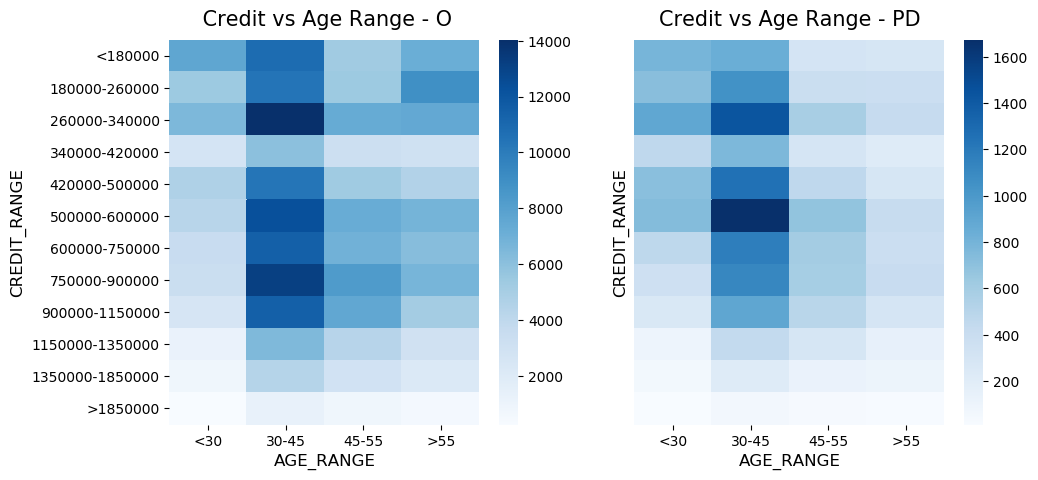

In [47]:
# Heatmap Credit_range - AGE Range - Target

sns.reset_defaults()
plt.rcdefaults()


res=pd.pivot_table(data=df[df.TARGET==0],index='CREDIT_RANGE',columns='AGE_RANGE',values='CNT'
               ,aggfunc=np.sum)
res1=pd.pivot_table(data=df[df.TARGET==1],index='CREDIT_RANGE',columns='AGE_RANGE',values='CNT'
               ,aggfunc=np.sum)

heatmap(data1=res,title1=' Credit vs Age Range - O',data2=res1,title2='Credit vs Age Range - PD')





Points to be concluded from the above graph.

1.Credit Range 500000- 600000 has high pament difficulty for 30-45 age range clients.


In [48]:
corr=df.iloc[:,2:].corr()

In [49]:
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()
corr_df.columns=['Var1','Var2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Correlation_abs']=corr_df.Correlation.abs()
corr_df.sort_values('Correlation_abs',ascending=False,inplace=True)

In [50]:
corr_df[corr_df.Correlation_abs>.5].reset_index(drop=True)

,Var1,Var2,Correlation,Correlation_abs
0,AMT_GOODS_PRICE,AMT_CREDIT,0.986968,0.986968
1,AMT_GOODS_PRICE,AMT_ANNUITY,0.775109,0.775109
2,AMT_ANNUITY,AMT_CREDIT,0.770138,0.770138


- ### Previous Application data 

In [51]:
# Reading the dataset of previous application

df1=pd.read_csv("previous_application.csv")



In [52]:
# Cleaning the missing data

# listing the null values columns having more than 40%

drop_cols_pa=df1.isnull().sum()[df1.isnull().sum()/df1.shape[0] > .4]/df1.shape[0]
df1.drop(columns=drop_cols_pa.index,inplace=True)


In [53]:
df1.shape

(1670214, 26)

In [54]:
# Removing the column values of 'XNA' and 'XAP'

#df1=df1[~(df1['NAME_CASH_LOAN_PURPOSE'].isin(['XNA','XAP']))]


#As the % of XNA and XAP is high, removing the rows might alter other insights, so replacing them with NaN
df1.loc[df1.NAME_CASH_LOAN_PURPOSE.isin(['XNA','XAP']),'NAME_CASH_LOAN_PURPOSE']= np.NaN



In [55]:
# Now merging the Application dataset with previous appliaction dataset

new_df=pd.merge(left=df,right=df1,how='inner',on='SK_ID_CURR',suffixes='_p')

In [56]:
#Replacing the '_' with " " and 'p' with 'PREV' 

new_df.columns[new_df.columns.str.endswith('_')]#.replace('p','')
new_df.columns[new_df.columns.str.endswith('p')]

Index(['NAME_CONTRACT_TYPEp', 'AMT_ANNUITYp', 'AMT_CREDITp',
       'AMT_GOODS_PRICEp'],
      dtype='object')

In [57]:
#Renaming the column names

new_df1 = new_df.rename({
    'NAME_CONTRACT_TYPE_':'NAME_CONTRACT_TYPE', 'AMT_CREDIT_':'AMT_CREDIT', 'AMT_ANNUITY_':'AMT_ANNUITY' ,
       'AMT_GOODS_PRICE_':'AMT_GOODS_PRICE','NAME_CONTRACT_TYPEp':'NAME_CONTRACT_TYPE_PREV', 'AMT_ANNUITYp':'AMT_ANNUITY_PREV',
    'AMT_CREDITp':'AMT_CREDIT_PREV',
       'AMT_GOODS_PRICEp':'AMT_GOODS_PRICE_PREV'}, axis=1
)

In [58]:
# Removing unwanted columns for analysis

new_df1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY','AMT_APPLICATION','NAME_PAYMENT_TYPE','SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
         'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION' ,'DAYS_DECISION' ,'SK_ID_PREV' ,'CHANNEL_TYPE','CODE_REJECT_REASON',
             'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO','NAME_PRODUCT_TYPE'],axis=1,inplace=True)

In [59]:
#Imputing wrong data with mode

new_df1.loc[new_df1.NAME_CONTRACT_TYPE_PREV=='XNA','NAME_CONTRACT_TYPE_PREV']= new_df1.NAME_CONTRACT_TYPE_PREV.mode()
new_df1.loc[new_df1.NAME_CLIENT_TYPE=='XNA','NAME_CLIENT_TYPE']= new_df1.NAME_CLIENT_TYPE.mode()

In [60]:
new_df1.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'FAMILY_SIZE', 'AGE_IN_YEARS',
       'EXPERIENCE_IN_YEARS', 'POPULATION_DENSITY', 'AGE_RANGE',
       'EXPERIENCE_RANGE', 'REGION_RATING', 'INCOME_RANGE', 'CREDIT_RANGE',
       'CNT', 'NAME_CONTRACT_TYPE_PREV', 'AMT_ANNUITY_PREV', 'AMT_CREDIT_PREV',
       'AMT_GOODS_PRICE_PREV', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE'],
      dtype='object')


- ### Insights - Heatmap

Understanding the Catagorical Variables for Male and Female Seperatly

To count the values distributed accross two different Catogorical Variables we derived pivot tables for Gender M and F
with the help of additional column CNT having the value 1 for all the rows.

Understanding the Heatmaps:
1. Left : Male 
2. Right : Female 




In [61]:
# CNT column

new_df1['CNT']=1

#### Heatmap against Target 0(others - O) and 1(Payment Difficults - PD)

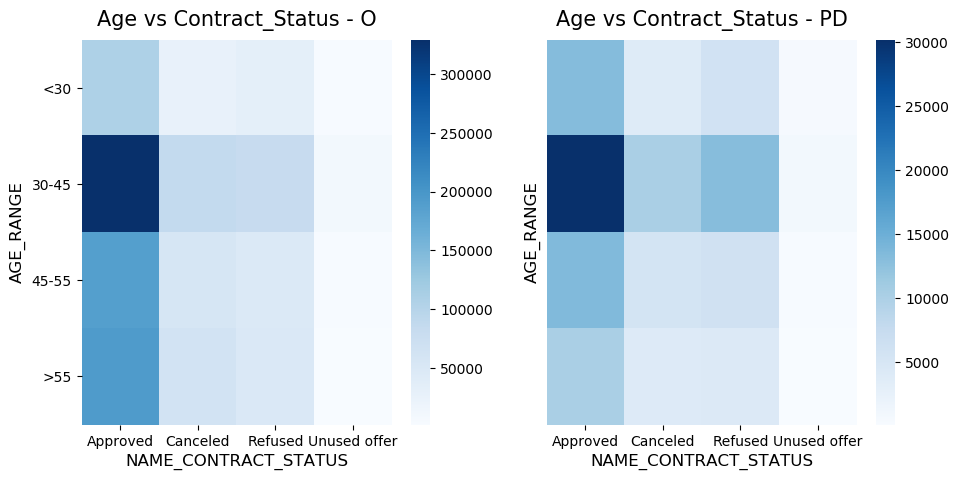

In [62]:
#Heatmap Age vs Contract_Status - Target

res=pd.pivot_table(data=new_df1[new_df1.TARGET==0],index='AGE_RANGE',columns='NAME_CONTRACT_STATUS',values='CNT'
               ,aggfunc=np.sum)
res1=pd.pivot_table(data=new_df1[new_df1.TARGET==1],index='AGE_RANGE',columns='NAME_CONTRACT_STATUS',values='CNT'
               ,aggfunc=np.sum)
sns.reset_defaults()
heatmap(data1=res,title1='Age vs Contract_Status - O',data2=res1,title2='Age vs Contract_Status - PD')




Points to be concluded from the above graph.

1. Approved Applicants for the Age Range 30-45 has high payment difficulty and repay capacity.


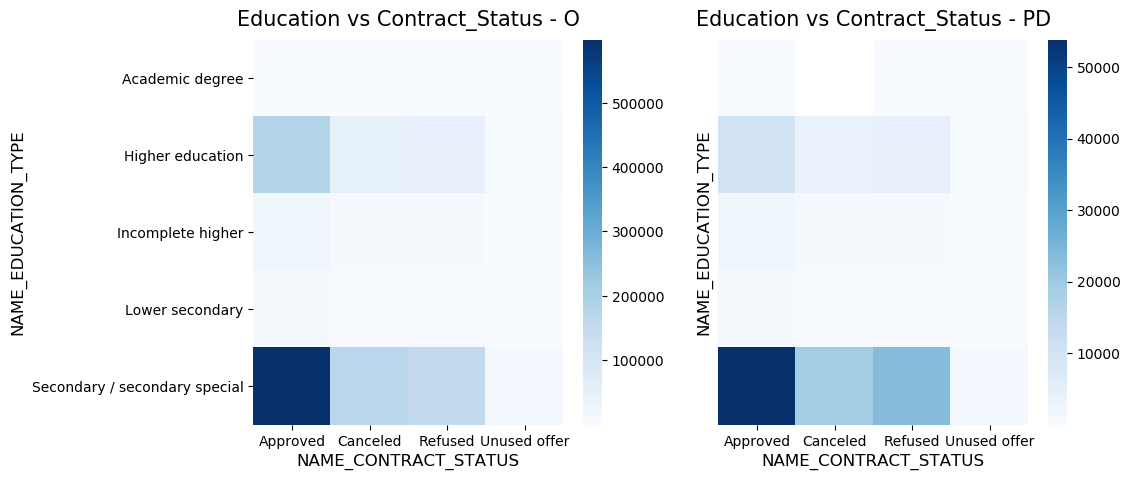

In [63]:
#Heatmap Education vs Contract_Status - Target

res=pd.pivot_table(data=new_df1[new_df1.TARGET==0],index='NAME_EDUCATION_TYPE',columns='NAME_CONTRACT_STATUS',values='CNT'
               ,aggfunc=np.sum)
res1=pd.pivot_table(data=new_df1[new_df1.TARGET==1],index='NAME_EDUCATION_TYPE',columns='NAME_CONTRACT_STATUS',values='CNT'
               ,aggfunc=np.sum)
sns.reset_defaults()
heatmap(data1=res,title1='Education vs Contract_Status - O',data2=res1,title2='Education vs Contract_Status - PD')




Points to be concluded from the above graph.
1. Secondary Education type has higher Approvals and Refused Applications.


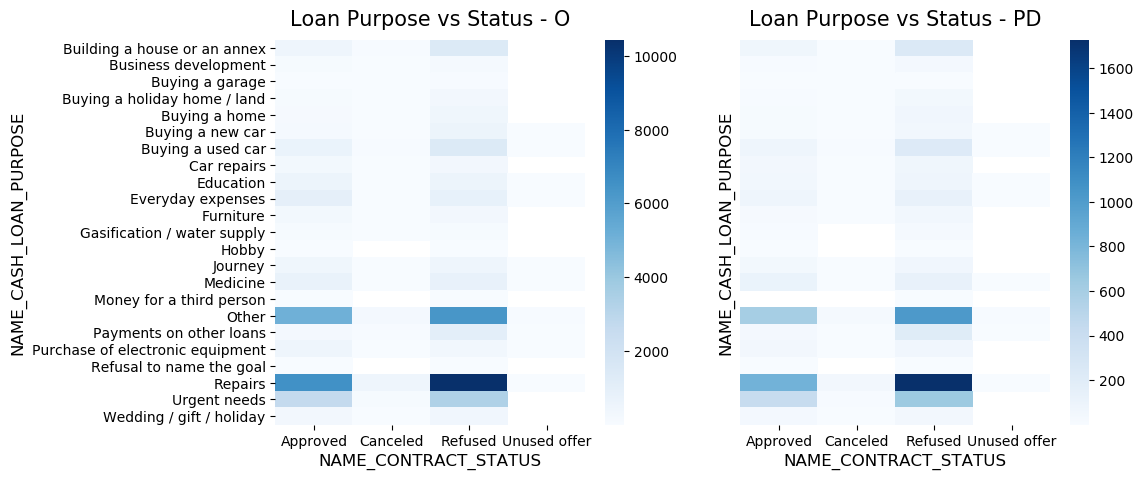

In [64]:
#heatmap Loan Purpose vs Status - Target

res=pd.pivot_table(data=new_df1[(new_df1.TARGET==0) & ~(new_df1.NAME_CASH_LOAN_PURPOSE.isin(['XAP','XNA']))],index='NAME_CASH_LOAN_PURPOSE',columns='NAME_CONTRACT_STATUS',values='CNT'
               ,aggfunc=np.sum)
res1=pd.pivot_table(data=new_df1[(new_df1.TARGET==1) & ~(new_df1.NAME_CASH_LOAN_PURPOSE.isin(['XAP','XNA']))],index='NAME_CASH_LOAN_PURPOSE',columns='NAME_CONTRACT_STATUS',values='CNT'
               ,aggfunc=np.sum)
sns.reset_defaults()
heatmap(data1=res,title1='Loan Purpose vs Status - O',data2=res1,title2='Loan Purpose vs Status - PD')




Points to be concluded from the above graph.
1. Highest repay capacity is with the cash loan purpose - Repairs and Other.


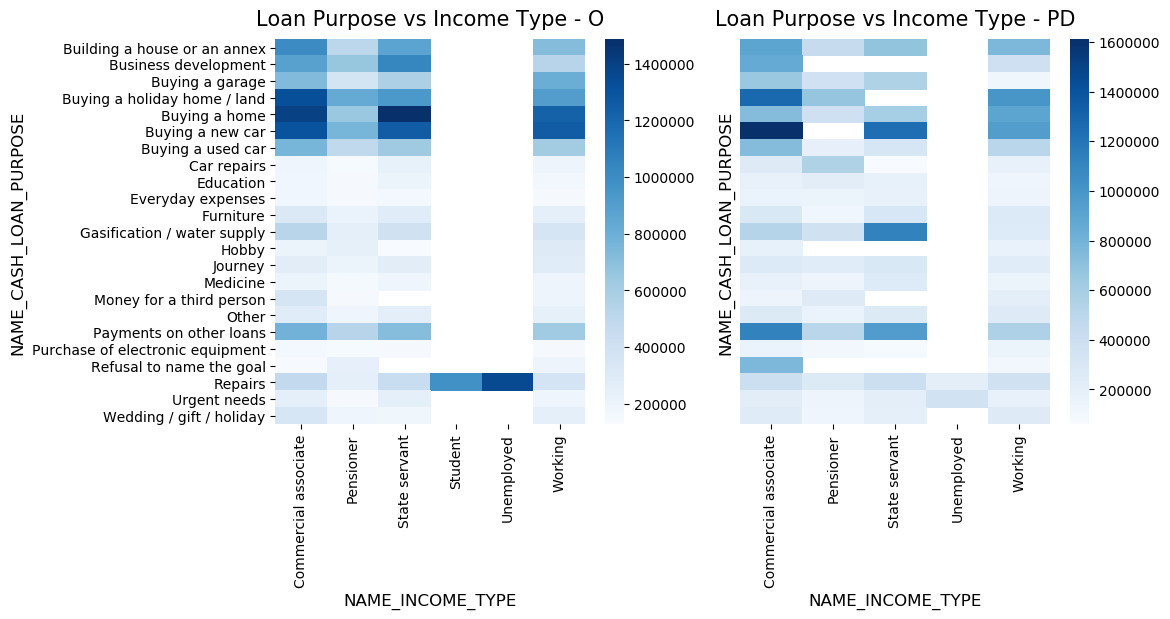

In [65]:
#Loan Purpose vs Income Type - Target

res=pd.pivot_table(data=new_df1[(new_df1.TARGET==0) & ~(new_df1.NAME_CASH_LOAN_PURPOSE.isin(['XAP','XNA']))],index='NAME_CASH_LOAN_PURPOSE',columns='NAME_INCOME_TYPE',values='AMT_CREDIT_PREV'
               ,aggfunc=np.median)
res1=pd.pivot_table(data=new_df1[(new_df1.TARGET==1) & ~(new_df1.NAME_CASH_LOAN_PURPOSE.isin(['XAP','XNA']))],index='NAME_CASH_LOAN_PURPOSE',columns='NAME_INCOME_TYPE',values='AMT_CREDIT_PREV'
               ,aggfunc=np.median)
sns.reset_defaults()
heatmap(data1=res,title1='Loan Purpose vs Income Type - O',data2=res1,title2='Loan Purpose vs Income Type - PD')




Points to be concluded from the above graph.
1. Higher repay capacity for Commercial Associates with purpose buying a holiday home/land and a house
2. State servents has high repay ability for buying a house.
3. Unemployed has high repay ability for repairs.
4. High default rate for Commercial Associates with purpose buying a car 

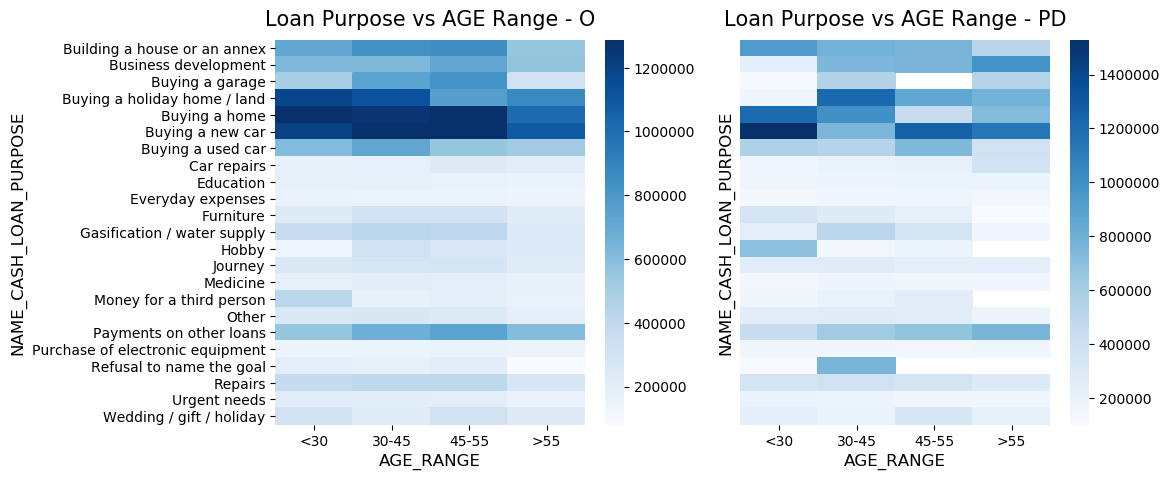

In [66]:
#Loan Purpose vs AGE RANGE - Target

res=pd.pivot_table(data=new_df1[(new_df1.TARGET==0) & ~(new_df1.NAME_CASH_LOAN_PURPOSE.isin(['XAP','XNA']))],index='NAME_CASH_LOAN_PURPOSE',columns='AGE_RANGE',values='AMT_CREDIT_PREV'
               ,aggfunc=np.median)
res1=pd.pivot_table(data=new_df1[(new_df1.TARGET==1) & ~(new_df1.NAME_CASH_LOAN_PURPOSE.isin(['XAP','XNA']))],index='NAME_CASH_LOAN_PURPOSE',columns='AGE_RANGE',values='AMT_CREDIT_PREV'
               ,aggfunc=np.median)
sns.reset_defaults()
heatmap(data1=res,title1='Loan Purpose vs AGE Range - O',data2=res1,title2='Loan Purpose vs AGE Range - PD')




Points to be concluded from the above graph.
1. Approving loans for age 30-45 for buying a car than <30 will be beneficial for bank.
2. Approving a Loan for buying a garage for the age 45-55 has high repay capacity

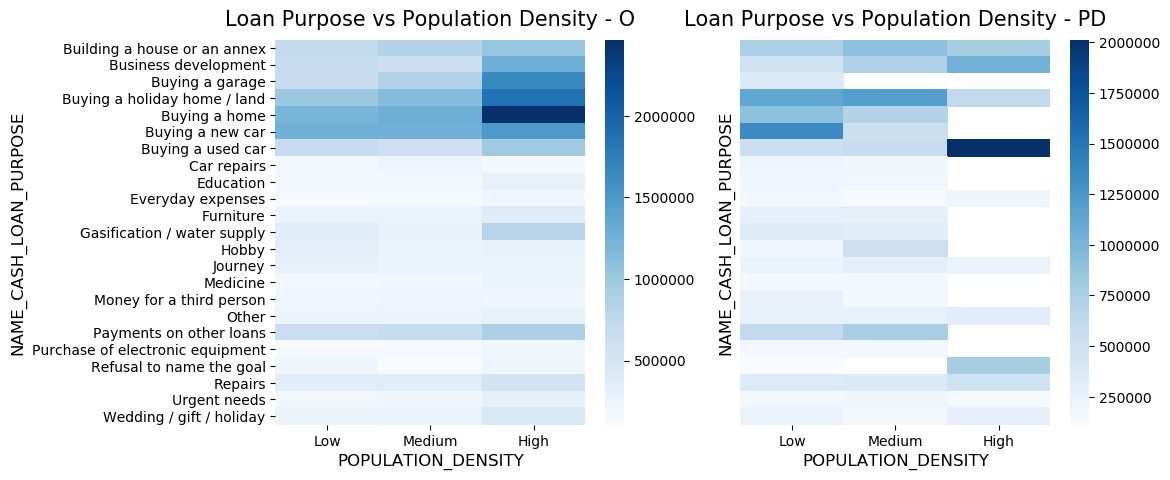

In [67]:
#Loan Purpose vs Population Density - Target

res=pd.pivot_table(data=new_df1[(new_df1.TARGET==0) & ~(new_df1.NAME_CASH_LOAN_PURPOSE.isin(['XAP','XNA']))],index='NAME_CASH_LOAN_PURPOSE',columns='POPULATION_DENSITY',values='AMT_CREDIT_PREV'
               ,aggfunc=np.median)
res1=pd.pivot_table(data=new_df1[(new_df1.TARGET==1) & ~(new_df1.NAME_CASH_LOAN_PURPOSE.isin(['XAP','XNA']))],index='NAME_CASH_LOAN_PURPOSE',columns='POPULATION_DENSITY',values='AMT_CREDIT_PREV'
               ,aggfunc=np.median)
sns.reset_defaults()
heatmap(data1=res,title1='Loan Purpose vs Population Density - O',data2=res1,title2='Loan Purpose vs Population Density - PD')




Points to be concluded from the above graph.

1. Client from high populated area Buying a home should be giving high priority.
2. Default rate is high for buying a used car from high Populated area


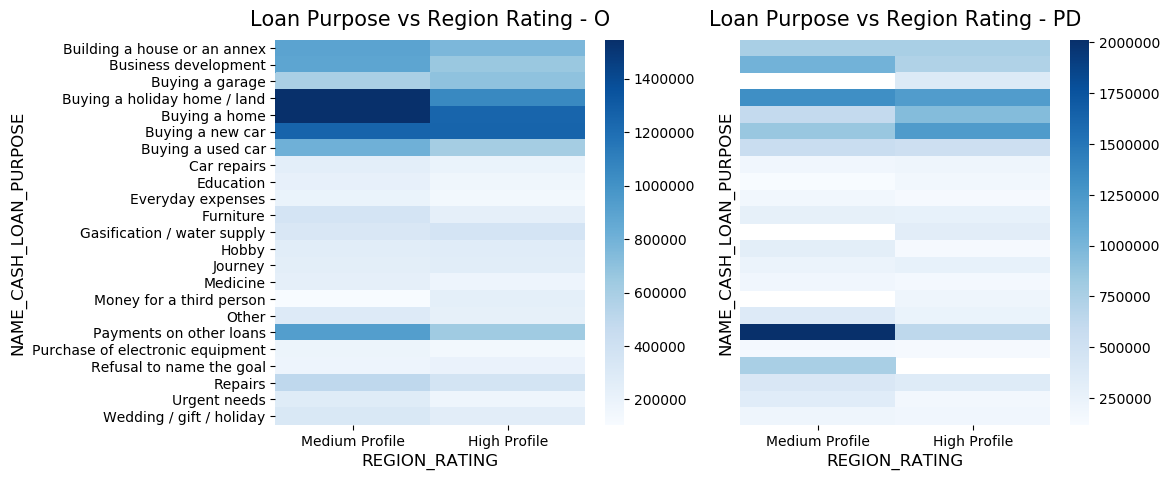

In [68]:
#Loan Purpose vs REGION_RATING - Target

res=pd.pivot_table(data=new_df1[(new_df1.TARGET==0) & ~(new_df1.NAME_CASH_LOAN_PURPOSE.isin(['XAP','XNA']))],index='NAME_CASH_LOAN_PURPOSE',columns='REGION_RATING',values='AMT_CREDIT_PREV'
               ,aggfunc=np.median)
res1=pd.pivot_table(data=new_df1[(new_df1.TARGET==1) & ~(new_df1.NAME_CASH_LOAN_PURPOSE.isin(['XAP','XNA']))],index='NAME_CASH_LOAN_PURPOSE',columns='REGION_RATING',values='AMT_CREDIT_PREV'
               ,aggfunc=np.median)
sns.reset_defaults()
heatmap(data1=res,title1='Loan Purpose vs Region Rating - O',data2=res1,title2='Loan Purpose vs Region Rating - PD')




Points to be concluded from the above graph.
1. Clients from Medium Profile Region has high default rate for the loan purpose of Payment of other loans.
2. Clients from Medium Profile Region has high repay capacity for the loan purpose of home and land.

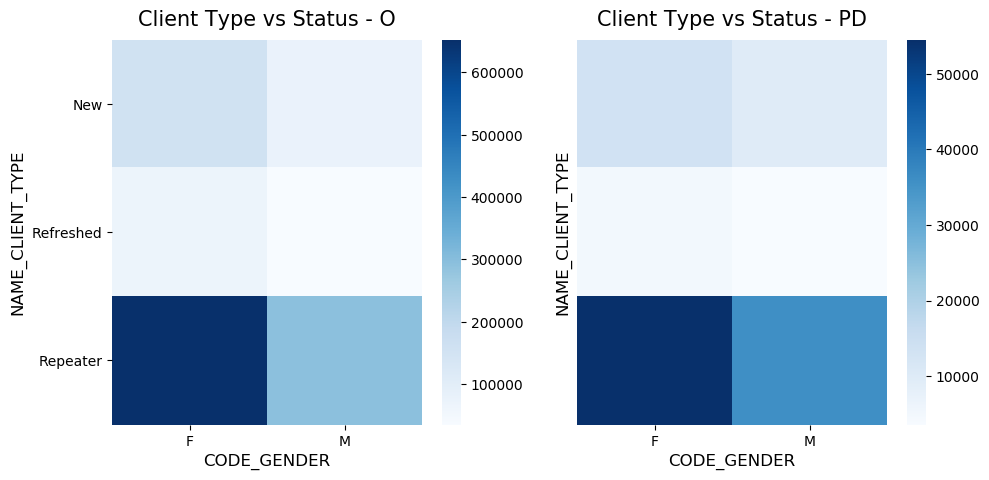

In [69]:
#Heatmap Client Type vs Status- Target
res=pd.pivot_table(data=new_df1[new_df1.TARGET==0],index='NAME_CLIENT_TYPE',columns='CODE_GENDER',values='CNT'
               ,aggfunc=np.sum)
res1=pd.pivot_table(data=new_df1[new_df1.TARGET==1],index='NAME_CLIENT_TYPE',columns='CODE_GENDER',values='CNT'
               ,aggfunc=np.sum)
sns.reset_defaults()
heatmap(data1=res,title1='Client Type vs Status - O',data2=res1,title2='Client Type vs Status - PD')


Points to be concluded from the above graph.

1. Male repeated clients has higher default rate.

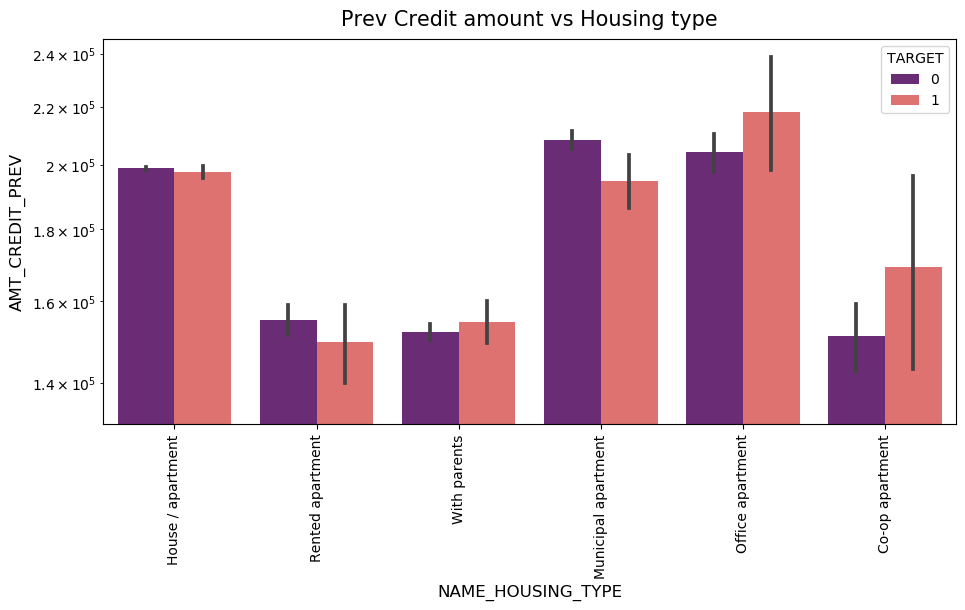

In [70]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(11,5))
plt.xticks(rotation=90)
plt.yscale('log')
sns.barplot(data =new_df1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE',palette='magma')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Points to be concluded from the above graph.
1. Loans for Municipal appartment is having higher repay capacity 
2. Office apparments and Co-operative apartments has high payment difficulties.

- ### Conclusions:

1. Credit Range 500000- 600000 has high payment difficulty with Secondary Education type, Small Family size for Loan type Cash.
2. Clients with Academic degree and Student as Education type has no difficulties
3. Income range between 1.2L - 1.4L has high payment difficulties with the age range between 30-45.
4. Clients with Experience 41-50 has no payment difficulty.
5. Payment Difficulty is high for buying a used car from high Populated Density and Buying a home should be giving high priority.
6. Office apartments and Co-operative apartments has high payment difficulties.
7. Higher repay capacity for Commercial Associates with loan purpose buying a holiday home/land and a house and high payment difficulty for buying a car
8. Loans for Municipal apartment is having higher repay capacity  and high payment difficulties for Office apartments and Co-operative apartments
9. Approving loans for age 30-45 for buying a car than <30 will be beneficial for bank.
10. Approving a Loan for buying a garage for the age 45-55 has high repayment of loans
11. Clients from Medium Profile Region has high repayment for the loan purpose of home and land and high default for Payment of other loans.
12. Client Type - Repeater Male has payment difficulty than Women.
13. Occupation Type, State servants has high repayment for loan purpose buying a house and Unemployed has high repayment for loan purpose repairs.